In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', 999)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow_core.estimator import inputs
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
def normalize_and_encode(dataframe):
    column_names_to_not_normalize = ['result']
    column_names_to_normalize = [x for x in list(dataframe) if x not in column_names_to_not_normalize ]
    x = dataframe[column_names_to_normalize].values
    x_scaled = preprocessing.normalize(x)
    df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = dataframe.index)
    dataframe[column_names_to_normalize] = df_temp

    le = preprocessing.LabelEncoder()
    le.fit([ "H", "A", "D"])
    dataframe.loc[:,['result']]=le.transform(dataframe['result'])
    
    return dataframe

def get_X_and_y(dataframe):
    X = dataframe.drop(columns=['result']).values
    y = dataframe[['result']].values
    return X,y

df01 = pd.read_csv('../data/sliding01.csv', sep=',', index_col=0)
df02 = pd.read_csv('../data/sliding02_shots.csv', sep=',', index_col=0)
df03 = pd.read_csv('../data/sliding03_shots_extra.csv', sep=',', index_col=0)
df04 = pd.read_csv('../data/sliding04_shots_possession_extra.csv', sep=',', index_col=0)

n01 = normalize_and_encode(df01)
n02 = normalize_and_encode(df02)
n03 = normalize_and_encode(df03)
n04 = normalize_and_encode(df04)

train01, test01 = train_test_split(n01, test_size=0.1)
print(len(train01), 'train examples')
print(len(test01), 'test examples')

train02, test02 = train_test_split(n02, test_size=0.1)
print(len(train02), 'train examples')
print(len(test02), 'test examples')

train03, test03 = train_test_split(n03, test_size=0.1)
print(len(train03), 'train examples')
print(len(test03), 'test examples')

train04, test04 = train_test_split(n04, test_size=0.1)
print(len(train04), 'train examples')
print(len(test04), 'test examples')


train_X01,train_y01 = get_X_and_y(train01)
train_X02,train_y02 = get_X_and_y(train02)
train_X03,train_y03 = get_X_and_y(train03)
train_X04,train_y04 = get_X_and_y(train04)

test_X01,test_y01 = get_X_and_y(test01)
test_X02,test_y02 = get_X_and_y(test02)
test_X03,test_y03 = get_X_and_y(test03)
test_X04,test_y04 = get_X_and_y(test04)

18740 train examples
2083 test examples
6329 train examples
704 test examples
6329 train examples
704 test examples
6296 train examples
700 test examples


In [3]:
n01

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,2,0.049957,0.165301,0.330601,0.183667,0.110200,0.073467,0.514268,0.367334,0.073467,0.073467,0.220401,0.293868,0.514268
1,1,0.077897,0.103862,0.121172,0.103862,0.138483,0.103862,0.553931,0.415448,0.138483,0.103862,0.103862,0.484690,0.415448
2,1,0.109311,0.117119,0.105407,0.195198,0.078079,0.117119,0.390396,0.312317,0.156158,0.156158,0.078079,0.585594,0.507514
3,0,0.068789,0.117049,0.155945,0.180075,0.108045,0.072030,0.648271,0.396166,0.108045,0.108045,0.144060,0.360151,0.396166
4,2,0.108097,0.154424,0.205899,0.102949,0.205899,0.205899,0.308848,0.463272,0.051475,0.308848,0.154424,0.360322,0.514746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20818,2,0.162536,0.123527,0.055262,0.097521,0.065014,0.162536,0.260057,0.487607,0.065014,0.130029,0.130029,0.325071,0.682650
20819,2,0.061498,0.110696,0.113771,0.092247,0.092247,0.122995,0.307489,0.584228,0.030749,0.122995,0.153744,0.215242,0.645726
20820,2,0.073697,0.153535,0.184242,0.122828,0.163770,0.122828,0.409426,0.368484,0.204713,0.081885,0.122828,0.614139,0.368484
20821,2,0.044350,0.175065,0.300111,0.066691,0.100037,0.166729,0.400149,0.466840,0.100037,0.100037,0.133383,0.366803,0.533532


In [4]:
n02

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-opposition_shots,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target
0,2,0.012482,0.011769,0.007489,0.003566,0.010699,0.021398,0.039230,0.057061,0.488587,0.238944,0.417260,0.189015,0.028531,0.007133,0.000000,0.053495,0.021398,0.574178,0.278173,0.256775,0.106990
1,1,0.009236,0.012191,0.010640,0.011083,0.003694,0.022166,0.029555,0.059110,0.495044,0.236439,0.557848,0.284465,0.011083,0.011083,0.014777,0.040638,0.066498,0.384213,0.162552,0.321409,0.132997
2,0,0.007188,0.012795,0.015805,0.015053,0.007526,0.015053,0.037632,0.056448,0.451585,0.218266,0.466638,0.210740,0.007526,0.007526,0.022579,0.041395,0.056448,0.504270,0.222029,0.376321,0.173108
3,2,0.010289,0.010289,0.007281,0.015829,0.006332,0.009497,0.069647,0.037989,0.560339,0.259592,0.234266,0.117133,0.018995,0.009497,0.003166,0.060149,0.025326,0.535013,0.300747,0.357730,0.183614
4,2,0.004077,0.020384,0.064551,0.023782,0.006795,0.003397,0.050961,0.027179,0.546982,0.244613,0.251408,0.105320,0.010192,0.006795,0.016987,0.033974,0.057756,0.485829,0.234421,0.455252,0.234421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,2,0.020289,0.015420,0.006898,0.016231,0.008116,0.016231,0.040578,0.048694,0.324626,0.174487,0.474766,0.243470,0.008116,0.016231,0.016231,0.040578,0.085214,0.482881,0.235354,0.454477,0.263759
7029,2,0.009960,0.017929,0.018427,0.014941,0.009960,0.024901,0.044822,0.104584,0.443238,0.234070,0.458179,0.229089,0.004980,0.019921,0.024901,0.034861,0.104584,0.517941,0.273911,0.313753,0.129485
7030,2,0.007617,0.015870,0.019044,0.012696,0.012696,0.016928,0.033855,0.033855,0.516293,0.249683,0.389336,0.211596,0.021160,0.008464,0.012696,0.063479,0.038087,0.355481,0.181972,0.499366,0.236987
7031,2,0.005271,0.020806,0.035667,0.007926,0.011889,0.019815,0.047556,0.055483,0.491416,0.245708,0.392341,0.198152,0.011889,0.011889,0.015852,0.043593,0.067372,0.408193,0.210041,0.483490,0.214004


In [5]:
n03

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-opposition_shots,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target,home_shot_accuracy,home_shot_efficiency,home_opposition_shot_accuracy,home_opposition_shot_efficiency,away_shot_accuracy,away_shot_efficiency,away_opposition_shot_accuracy,away_opposition_shot_efficiency
0,2,0.012482,0.011769,0.007489,0.003566,0.010699,0.021398,0.039229,0.057061,0.488583,0.238942,0.417257,0.189014,0.028530,0.007133,0.000000,0.053495,0.021398,0.574174,0.278171,0.256774,0.106989,0.001744,0.000586,0.001616,0.001077,0.001728,0.000686,0.001486,0.000713
1,1,0.009236,0.012191,0.010640,0.011083,0.003694,0.022166,0.029555,0.059109,0.495039,0.236437,0.557843,0.284463,0.011083,0.011083,0.014777,0.040638,0.066498,0.384210,0.162550,0.321406,0.132996,0.001764,0.000462,0.001884,0.000768,0.001563,0.000924,0.001529,0.001847
2,0,0.007188,0.012795,0.015805,0.015053,0.007526,0.015053,0.037632,0.056448,0.451581,0.218264,0.466634,0.210738,0.007526,0.007526,0.022579,0.041395,0.056448,0.504266,0.222028,0.376318,0.173106,0.001819,0.000649,0.001699,0.001008,0.001657,0.000702,0.001731,0.001227
3,2,0.010289,0.010289,0.007281,0.015829,0.006331,0.009497,0.069646,0.037989,0.560335,0.259590,0.234264,0.117132,0.018994,0.009497,0.003166,0.060149,0.025326,0.535009,0.300745,0.357728,0.183613,0.001467,0.000849,0.001583,0.001027,0.001780,0.000633,0.001625,0.000437
4,2,0.004077,0.020384,0.064550,0.023782,0.006795,0.003397,0.050961,0.027179,0.546979,0.244612,0.251406,0.105319,0.010192,0.006795,0.016987,0.033974,0.057756,0.485826,0.234419,0.455249,0.234419,0.001519,0.000708,0.001423,0.000877,0.001639,0.000492,0.001749,0.000837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,2,0.020289,0.015420,0.006898,0.016231,0.008116,0.016231,0.040578,0.048693,0.324623,0.174485,0.474761,0.243467,0.008116,0.016231,0.016231,0.040578,0.085213,0.482876,0.235351,0.454472,0.263756,0.002181,0.000944,0.002081,0.000812,0.001978,0.000700,0.002355,0.001311
7029,2,0.009960,0.017928,0.018426,0.014940,0.009960,0.024900,0.044821,0.104582,0.443228,0.234064,0.458168,0.229084,0.004980,0.019920,0.024900,0.034861,0.104582,0.517929,0.273905,0.313745,0.129482,0.002630,0.000954,0.002490,0.002274,0.002634,0.000634,0.002055,0.004022
7030,2,0.007617,0.015870,0.019043,0.012696,0.012696,0.016927,0.033855,0.033855,0.516288,0.249680,0.389332,0.211593,0.021159,0.008464,0.012696,0.063478,0.038087,0.355477,0.181970,0.499360,0.236985,0.002047,0.000574,0.002300,0.000677,0.002166,0.001476,0.002008,0.000680
7031,2,0.005271,0.020806,0.035667,0.007926,0.011889,0.019815,0.047556,0.055482,0.491412,0.245706,0.392337,0.198150,0.011889,0.011889,0.015852,0.043593,0.067371,0.408189,0.210039,0.483486,0.214002,0.001981,0.000767,0.002002,0.001110,0.002039,0.000823,0.001754,0.001248


In [6]:
n04

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-possession,home-opposition_shots,home-opposition_shots_on_target,home-opposition_possession,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-possession,away-opposition_shots,away-opposition_shots_on_target,away-opposition_possession,home_shot_accuracy,home_shot_efficiency,home_opposition_shot_accuracy,home_opposition_shot_efficiency,away_shot_accuracy,away_shot_efficiency,away_opposition_shot_accuracy,away_opposition_shot_efficiency
0,2,0.012482,0.011769,0.007489,0.003566,0.010699,0.021398,0.039229,0.057060,0.488580,0.238941,0.001887,0.417255,0.189013,0.001680,0.028530,0.007133,0.000000,0.053494,0.021398,0.574171,0.278170,0.001886,0.256772,0.106988,0.001680,0.001744,0.000586,0.001615,0.001077,0.001728,0.000686,0.001486,0.000713
1,2,0.010056,0.010056,0.007116,0.015470,0.006188,0.009282,0.058786,0.037128,0.584770,0.275368,0.001837,0.213488,0.111385,0.001257,0.018564,0.009282,0.003094,0.058786,0.024752,0.522890,0.293932,0.001865,0.349625,0.179453,0.001229,0.001457,0.000661,0.001614,0.001031,0.001739,0.000619,0.001588,0.000427
2,2,0.004131,0.020657,0.065414,0.024100,0.006886,0.003443,0.051643,0.027543,0.554301,0.247886,0.001803,0.254772,0.106729,0.001640,0.006886,0.006886,0.020657,0.030986,0.061972,0.454458,0.213458,0.001607,0.478558,0.244443,0.001836,0.001540,0.000717,0.001442,0.000888,0.001617,0.000500,0.001759,0.000873
3,0,0.008720,0.012090,0.010991,0.010991,0.010991,0.014655,0.032974,0.040301,0.373702,0.172196,0.001766,0.487279,0.282109,0.001897,0.010991,0.007327,0.018319,0.032974,0.058620,0.424995,0.197842,0.001646,0.479951,0.234480,0.002018,0.001688,0.000702,0.002121,0.000523,0.001706,0.000611,0.001790,0.000916
4,0,0.008796,0.010995,0.009473,0.013532,0.003383,0.016916,0.050747,0.054130,0.422888,0.213136,0.001622,0.517615,0.246967,0.001761,0.013532,0.010149,0.010149,0.043980,0.054130,0.348460,0.172538,0.001621,0.466868,0.257116,0.001762,0.001705,0.000806,0.001614,0.000742,0.001675,0.000862,0.001863,0.000712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,2,0.020289,0.015419,0.006898,0.016231,0.008115,0.016231,0.040577,0.048693,0.324620,0.174483,0.001846,0.474757,0.243465,0.002212,0.008115,0.016231,0.016231,0.040577,0.085213,0.482872,0.235349,0.001733,0.454468,0.263754,0.002325,0.002181,0.000944,0.002081,0.000812,0.001978,0.000700,0.002355,0.001311
6992,2,0.009960,0.017928,0.018426,0.014940,0.009960,0.024900,0.044820,0.104580,0.443222,0.234061,0.002136,0.458162,0.229081,0.002844,0.004980,0.019920,0.024900,0.034860,0.104580,0.517922,0.273901,0.002297,0.313741,0.129481,0.002683,0.002630,0.000954,0.002490,0.002273,0.002634,0.000634,0.002055,0.004022
6993,2,0.007617,0.015869,0.019043,0.012695,0.012695,0.016927,0.033855,0.033855,0.516283,0.249678,0.002087,0.389328,0.211591,0.002144,0.021159,0.008464,0.012695,0.063477,0.038086,0.355474,0.181969,0.002306,0.499356,0.236982,0.001925,0.002047,0.000574,0.002300,0.000677,0.002166,0.001476,0.002008,0.000680
6994,2,0.005271,0.020806,0.035667,0.007926,0.011889,0.019815,0.047556,0.055482,0.491408,0.245704,0.002312,0.392334,0.198148,0.001651,0.011889,0.011889,0.015852,0.043593,0.067370,0.408186,0.210037,0.001906,0.483482,0.214000,0.002057,0.001981,0.000767,0.002001,0.001110,0.002039,0.000823,0.001754,0.001248


In [7]:
#number of columns for training data
print(train_X01.shape[1])
print(train_X02.shape[1])
print(train_X03.shape[1])
print(train_X04.shape[1])

13
21
29
33


In [8]:
model01 = tf.keras.Sequential([
  layers.Dense(13, activation='relu',input_shape=(train_X01.shape[1],)), # 13 features
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )

model02 = tf.keras.Sequential([
  layers.Dense(21, activation='relu',input_shape=(train_X02.shape[1],)), # 21 features
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )

model03 = tf.keras.Sequential([
  layers.Dense(29, activation='relu',input_shape=(train_X03.shape[1],)), # 29 features
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )

model04 = tf.keras.Sequential([
  layers.Dense(33, activation='relu',input_shape=(train_X04.shape[1],)), # 33 features
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model04.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )


early_stoping = EarlyStopping(patience=50)
validation_split = 0.2
epochs=500

In [9]:
model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 569
Trainable params: 569
Non-trainable params: 0
_________________________________________________________________


In [10]:
model01.fit(train_X01, train_y01, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 14992 samples, validate on 3748 samples
Epoch 1/500
14992/14992 [==============================] - 4s 246us/sample - loss: 1.0439 - accuracy: 0.4747 - val_loss: 1.0256 - val_accuracy: 0.4995
Epoch 2/500
14992/14992 [==============================] - 2s 117us/sample - loss: 1.0125 - accuracy: 0.5078 - val_loss: 1.0074 - val_accuracy: 0.5035
Epoch 3/500
14992/14992 [==============================] - 2s 112us/sample - loss: 0.9999 - accuracy: 0.5135 - val_loss: 0.9998 - val_accuracy: 0.5029
Epoch 4/500
14992/14992 [==============================] - 1s 77us/sample - loss: 0.9938 - accuracy: 0.5154 - val_loss: 0.9958 - val_accuracy: 0.5061
Epoch 5/500
14992/14992 [==============================] - 1s 78us/sample - loss: 0.9902 - accuracy: 0.5175 - val_loss: 0.9926 - val_accuracy: 0.5051
Epoch 6/500
14992/14992 [==============================] - 1s 77us/sample - loss: 0.9877 - accuracy: 0.5190 - val_loss: 0.9898 - val_accuracy: 0.5117
Epoch 7/500
14992/14992 [=======================

Epoch 55/500
14992/14992 [==============================] - 1s 97us/sample - loss: 0.9708 - accuracy: 0.5324 - val_loss: 0.9767 - val_accuracy: 0.5221
Epoch 56/500
14992/14992 [==============================] - 1s 86us/sample - loss: 0.9707 - accuracy: 0.5301 - val_loss: 0.9769 - val_accuracy: 0.5251
Epoch 57/500
14992/14992 [==============================] - 1s 84us/sample - loss: 0.9706 - accuracy: 0.5314 - val_loss: 0.9768 - val_accuracy: 0.5235
Epoch 58/500
14992/14992 [==============================] - 1s 98us/sample - loss: 0.9707 - accuracy: 0.5309 - val_loss: 0.9767 - val_accuracy: 0.5224
Epoch 59/500
14992/14992 [==============================] - 1s 91us/sample - loss: 0.9706 - accuracy: 0.5304 - val_loss: 0.9779 - val_accuracy: 0.5235
Epoch 60/500
14992/14992 [==============================] - 1s 95us/sample - loss: 0.9708 - accuracy: 0.5309 - val_loss: 0.9767 - val_accuracy: 0.5251
Epoch 61/500
14992/14992 [==============================] - 2s 113us/sample - loss: 0.9707 - a

In [11]:
model02.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 21)                462       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 27        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
____________________________________________________

In [12]:
model02.fit(train_X02, train_y02, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5063 samples, validate on 1266 samples
Epoch 1/500
5063/5063 [==============================] - 2s 338us/sample - loss: 1.0645 - accuracy: 0.4679 - val_loss: 1.0769 - val_accuracy: 0.4368
Epoch 2/500
5063/5063 [==============================] - 0s 98us/sample - loss: 1.0587 - accuracy: 0.4669 - val_loss: 1.0753 - val_accuracy: 0.4368
Epoch 3/500
5063/5063 [==============================] - 0s 97us/sample - loss: 1.0579 - accuracy: 0.4669 - val_loss: 1.0749 - val_accuracy: 0.4368
Epoch 4/500
5063/5063 [==============================] - 1s 100us/sample - loss: 1.0566 - accuracy: 0.4669 - val_loss: 1.0736 - val_accuracy: 0.4368
Epoch 5/500
5063/5063 [==============================] - 1s 100us/sample - loss: 1.0513 - accuracy: 0.4669 - val_loss: 1.0662 - val_accuracy: 0.4368
Epoch 6/500
5063/5063 [==============================] - 1s 99us/sample - loss: 1.0467 - accuracy: 0.4669 - val_loss: 1.0615 - val_accuracy: 0.4368
Epoch 7/500
5063/5063 [==============================] - 1s 9

Epoch 110/500
5063/5063 [==============================] - 1s 99us/sample - loss: 0.9820 - accuracy: 0.5351 - val_loss: 0.9978 - val_accuracy: 0.5103
Epoch 111/500
5063/5063 [==============================] - 1s 152us/sample - loss: 0.9822 - accuracy: 0.5327 - val_loss: 0.9989 - val_accuracy: 0.5126
Epoch 112/500
5063/5063 [==============================] - 1s 123us/sample - loss: 0.9819 - accuracy: 0.5307 - val_loss: 0.9995 - val_accuracy: 0.5142
Epoch 113/500
5063/5063 [==============================] - 1s 125us/sample - loss: 0.9818 - accuracy: 0.5313 - val_loss: 0.9995 - val_accuracy: 0.5126
Epoch 114/500
5063/5063 [==============================] - 1s 105us/sample - loss: 0.9812 - accuracy: 0.5335 - val_loss: 0.9977 - val_accuracy: 0.5039
Epoch 115/500
5063/5063 [==============================] - 1s 146us/sample - loss: 0.9815 - accuracy: 0.5301 - val_loss: 0.9976 - val_accuracy: 0.5103
Epoch 116/500
5063/5063 [==============================] - 1s 158us/sample - loss: 0.9814 - acc

5063/5063 [==============================] - 0s 98us/sample - loss: 0.9723 - accuracy: 0.5368 - val_loss: 0.9896 - val_accuracy: 0.5134
Epoch 219/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9722 - accuracy: 0.5358 - val_loss: 0.9913 - val_accuracy: 0.5126
Epoch 220/500
5063/5063 [==============================] - 1s 112us/sample - loss: 0.9721 - accuracy: 0.5370 - val_loss: 0.9897 - val_accuracy: 0.5118
Epoch 221/500
5063/5063 [==============================] - 1s 112us/sample - loss: 0.9718 - accuracy: 0.5386 - val_loss: 0.9900 - val_accuracy: 0.5134
Epoch 222/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9715 - accuracy: 0.5368 - val_loss: 0.9903 - val_accuracy: 0.5063
Epoch 223/500
5063/5063 [==============================] - 1s 110us/sample - loss: 0.9720 - accuracy: 0.5349 - val_loss: 0.9906 - val_accuracy: 0.5111
Epoch 224/500
5063/5063 [==============================] - 1s 117us/sample - loss: 0.9719 - accuracy: 0.5366 - 

5063/5063 [==============================] - 1s 121us/sample - loss: 0.9674 - accuracy: 0.5398 - val_loss: 0.9866 - val_accuracy: 0.5118
Epoch 327/500
5063/5063 [==============================] - 1s 124us/sample - loss: 0.9675 - accuracy: 0.5366 - val_loss: 0.9870 - val_accuracy: 0.5142
Epoch 328/500
5063/5063 [==============================] - 1s 118us/sample - loss: 0.9676 - accuracy: 0.5388 - val_loss: 0.9866 - val_accuracy: 0.5118
Epoch 329/500
5063/5063 [==============================] - 1s 124us/sample - loss: 0.9676 - accuracy: 0.5380 - val_loss: 0.9865 - val_accuracy: 0.5142
Epoch 330/500
5063/5063 [==============================] - 1s 107us/sample - loss: 0.9672 - accuracy: 0.5396 - val_loss: 0.9907 - val_accuracy: 0.5079
Epoch 331/500
5063/5063 [==============================] - 1s 117us/sample - loss: 0.9676 - accuracy: 0.5394 - val_loss: 0.9862 - val_accuracy: 0.5126
Epoch 332/500
5063/5063 [==============================] - 1s 124us/sample - loss: 0.9669 - accuracy: 0.5386

5063/5063 [==============================] - 1s 128us/sample - loss: 0.9640 - accuracy: 0.5398 - val_loss: 0.9941 - val_accuracy: 0.5063
Epoch 435/500
5063/5063 [==============================] - 1s 121us/sample - loss: 0.9640 - accuracy: 0.5428 - val_loss: 0.9855 - val_accuracy: 0.5087
Epoch 436/500
5063/5063 [==============================] - 1s 121us/sample - loss: 0.9647 - accuracy: 0.5398 - val_loss: 0.9888 - val_accuracy: 0.5063
Epoch 437/500
5063/5063 [==============================] - 1s 115us/sample - loss: 0.9642 - accuracy: 0.5410 - val_loss: 0.9863 - val_accuracy: 0.5126
Epoch 438/500
5063/5063 [==============================] - 1s 110us/sample - loss: 0.9642 - accuracy: 0.5420 - val_loss: 0.9860 - val_accuracy: 0.5126
Epoch 439/500
5063/5063 [==============================] - 1s 111us/sample - loss: 0.9644 - accuracy: 0.5418 - val_loss: 0.9844 - val_accuracy: 0.5126
Epoch 440/500
5063/5063 [==============================] - 1s 109us/sample - loss: 0.9642 - accuracy: 0.5404

In [13]:
model03.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 29)                870       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 27        
Total params: 5,561
Trainable params: 5,561
Non-trainable params: 0
____________________________________________________

In [14]:
model03.fit(train_X03, train_y03, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5063 samples, validate on 1266 samples
Epoch 1/500
5063/5063 [==============================] - 2s 374us/sample - loss: 1.0742 - accuracy: 0.4484 - val_loss: 1.0623 - val_accuracy: 0.4645
Epoch 2/500
5063/5063 [==============================] - 1s 123us/sample - loss: 1.0613 - accuracy: 0.4584 - val_loss: 1.0574 - val_accuracy: 0.4645
Epoch 3/500
5063/5063 [==============================] - 1s 121us/sample - loss: 1.0579 - accuracy: 0.4584 - val_loss: 1.0563 - val_accuracy: 0.4645
Epoch 4/500
5063/5063 [==============================] - 1s 106us/sample - loss: 1.0540 - accuracy: 0.4584 - val_loss: 1.0510 - val_accuracy: 0.4645
Epoch 5/500
5063/5063 [==============================] - 1s 113us/sample - loss: 1.0502 - accuracy: 0.4584 - val_loss: 1.0456 - val_accuracy: 0.4645
Epoch 6/500
5063/5063 [==============================] - 1s 122us/sample - loss: 1.0457 - accuracy: 0.4584 - val_loss: 1.0405 - val_accuracy: 0.4645
Epoch 7/500
5063/5063 [==============================] - 1

Epoch 110/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9777 - accuracy: 0.5317 - val_loss: 0.9700 - val_accuracy: 0.5261
Epoch 111/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9773 - accuracy: 0.5335 - val_loss: 0.9663 - val_accuracy: 0.5355
Epoch 112/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9777 - accuracy: 0.5303 - val_loss: 0.9659 - val_accuracy: 0.5355
Epoch 113/500
5063/5063 [==============================] - 0s 99us/sample - loss: 0.9771 - accuracy: 0.5360 - val_loss: 0.9664 - val_accuracy: 0.5442
Epoch 114/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9774 - accuracy: 0.5319 - val_loss: 0.9661 - val_accuracy: 0.5348
Epoch 115/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9775 - accuracy: 0.5339 - val_loss: 0.9661 - val_accuracy: 0.5450
Epoch 116/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9769 - accuracy:

5063/5063 [==============================] - 1s 99us/sample - loss: 0.9716 - accuracy: 0.5343 - val_loss: 0.9606 - val_accuracy: 0.5419
Epoch 219/500
5063/5063 [==============================] - 1s 101us/sample - loss: 0.9713 - accuracy: 0.5358 - val_loss: 0.9612 - val_accuracy: 0.5387
Epoch 220/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9713 - accuracy: 0.5341 - val_loss: 0.9606 - val_accuracy: 0.5371
Epoch 221/500
5063/5063 [==============================] - 1s 102us/sample - loss: 0.9711 - accuracy: 0.5372 - val_loss: 0.9613 - val_accuracy: 0.5395
Epoch 222/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9713 - accuracy: 0.5362 - val_loss: 0.9605 - val_accuracy: 0.5403
Epoch 223/500
5063/5063 [==============================] - 0s 99us/sample - loss: 0.9706 - accuracy: 0.5392 - val_loss: 0.9616 - val_accuracy: 0.5355
Epoch 224/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9710 - accuracy: 0.5357 - va

5063/5063 [==============================] - 1s 155us/sample - loss: 0.9678 - accuracy: 0.5378 - val_loss: 0.9589 - val_accuracy: 0.5355
Epoch 327/500
5063/5063 [==============================] - 1s 144us/sample - loss: 0.9680 - accuracy: 0.5384 - val_loss: 0.9589 - val_accuracy: 0.5340
Epoch 328/500
5063/5063 [==============================] - 1s 129us/sample - loss: 0.9679 - accuracy: 0.5388 - val_loss: 0.9588 - val_accuracy: 0.5355
Epoch 329/500
5063/5063 [==============================] - 1s 131us/sample - loss: 0.9674 - accuracy: 0.5378 - val_loss: 0.9585 - val_accuracy: 0.5371
Epoch 330/500
5063/5063 [==============================] - 1s 139us/sample - loss: 0.9676 - accuracy: 0.5378 - val_loss: 0.9591 - val_accuracy: 0.5355
Epoch 331/500
5063/5063 [==============================] - 1s 130us/sample - loss: 0.9679 - accuracy: 0.5368 - val_loss: 0.9586 - val_accuracy: 0.5395
Epoch 332/500
5063/5063 [==============================] - 1s 164us/sample - loss: 0.9676 - accuracy: 0.5347

5063/5063 [==============================] - 1s 99us/sample - loss: 0.9657 - accuracy: 0.5380 - val_loss: 0.9589 - val_accuracy: 0.5340
Epoch 435/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9657 - accuracy: 0.5388 - val_loss: 0.9585 - val_accuracy: 0.5340
Epoch 436/500
5063/5063 [==============================] - 1s 104us/sample - loss: 0.9653 - accuracy: 0.5382 - val_loss: 0.9588 - val_accuracy: 0.5371
Epoch 437/500
5063/5063 [==============================] - 1s 107us/sample - loss: 0.9656 - accuracy: 0.5408 - val_loss: 0.9597 - val_accuracy: 0.5316
Epoch 438/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9648 - accuracy: 0.5394 - val_loss: 0.9614 - val_accuracy: 0.5261
Epoch 439/500
5063/5063 [==============================] - 1s 101us/sample - loss: 0.9647 - accuracy: 0.5406 - val_loss: 0.9579 - val_accuracy: 0.5355
Epoch 440/500
5063/5063 [==============================] - 1s 103us/sample - loss: 0.9659 - accuracy: 0.5394 -

In [15]:
model04.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 33)                1122      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2176      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 27        
Total params: 6,069
Trainable params: 6,069
Non-trainable params: 0
____________________________________________________

In [16]:
model04.fit(train_X04, train_y04, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5036 samples, validate on 1260 samples
Epoch 1/500
5036/5036 [==============================] - 2s 413us/sample - loss: 1.0673 - accuracy: 0.4591 - val_loss: 1.0614 - val_accuracy: 0.4627
Epoch 2/500
5036/5036 [==============================] - 1s 117us/sample - loss: 1.0613 - accuracy: 0.4591 - val_loss: 1.0589 - val_accuracy: 0.4627
Epoch 3/500
5036/5036 [==============================] - 1s 150us/sample - loss: 1.0591 - accuracy: 0.4591 - val_loss: 1.0560 - val_accuracy: 0.4627
Epoch 4/500
5036/5036 [==============================] - 1s 122us/sample - loss: 1.0546 - accuracy: 0.4591 - val_loss: 1.0505 - val_accuracy: 0.4627
Epoch 5/500
5036/5036 [==============================] - 1s 101us/sample - loss: 1.0502 - accuracy: 0.4591 - val_loss: 1.0442 - val_accuracy: 0.4627
Epoch 6/500
5036/5036 [==============================] - 1s 152us/sample - loss: 1.0443 - accuracy: 0.4591 - val_loss: 1.0348 - val_accuracy: 0.4627
Epoch 7/500
5036/5036 [==============================] - 1

5036/5036 [==============================] - 1s 126us/sample - loss: 0.9770 - accuracy: 0.5340 - val_loss: 0.9757 - val_accuracy: 0.5238
Epoch 110/500
5036/5036 [==============================] - 1s 141us/sample - loss: 0.9770 - accuracy: 0.5326 - val_loss: 0.9841 - val_accuracy: 0.5151
Epoch 111/500
5036/5036 [==============================] - 1s 159us/sample - loss: 0.9772 - accuracy: 0.5296 - val_loss: 0.9775 - val_accuracy: 0.5246
Epoch 112/500
5036/5036 [==============================] - 1s 141us/sample - loss: 0.9763 - accuracy: 0.5302 - val_loss: 0.9757 - val_accuracy: 0.5214
Epoch 113/500
5036/5036 [==============================] - 1s 129us/sample - loss: 0.9764 - accuracy: 0.5320 - val_loss: 0.9812 - val_accuracy: 0.5198
Epoch 114/500
5036/5036 [==============================] - 1s 113us/sample - loss: 0.9766 - accuracy: 0.5304 - val_loss: 0.9761 - val_accuracy: 0.5270
Epoch 115/500
5036/5036 [==============================] - 1s 122us/sample - loss: 0.9765 - accuracy: 0.5306

5036/5036 [==============================] - 1s 131us/sample - loss: 0.9709 - accuracy: 0.5336 - val_loss: 0.9746 - val_accuracy: 0.5270
Epoch 218/500
5036/5036 [==============================] - 1s 138us/sample - loss: 0.9705 - accuracy: 0.5347 - val_loss: 0.9774 - val_accuracy: 0.5206
Epoch 219/500
5036/5036 [==============================] - 1s 112us/sample - loss: 0.9709 - accuracy: 0.5367 - val_loss: 0.9770 - val_accuracy: 0.5222
Epoch 220/500
5036/5036 [==============================] - 1s 101us/sample - loss: 0.9705 - accuracy: 0.5347 - val_loss: 0.9749 - val_accuracy: 0.5262
Epoch 221/500
5036/5036 [==============================] - 1s 100us/sample - loss: 0.9703 - accuracy: 0.5351 - val_loss: 0.9748 - val_accuracy: 0.5286
Epoch 222/500
5036/5036 [==============================] - 0s 99us/sample - loss: 0.9709 - accuracy: 0.5346 - val_loss: 0.9747 - val_accuracy: 0.5286
Epoch 223/500
5036/5036 [==============================] - 0s 97us/sample - loss: 0.9706 - accuracy: 0.5365 -

Test Score: 0.9722030112449217
Test Accuracy: 0.53768605


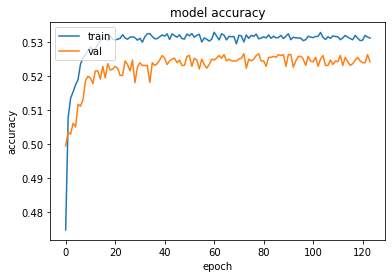

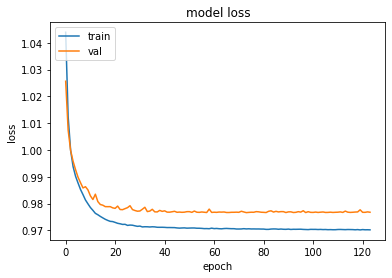

In [17]:
score = model01.evaluate(test_X01, test_y01, verbose=3)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model01.history.history['accuracy'])
plt.plot(model01.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model01.history.history['loss'])
plt.plot(model01.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score: 0.974122470075434
Test Accuracy: 0.52414775


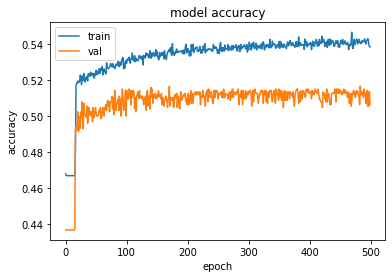

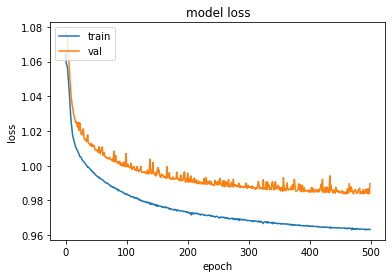

In [18]:
score = model02.evaluate(test_X02, test_y02, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model02.history.history['accuracy'])
plt.plot(model02.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model02.history.history['loss'])
plt.plot(model02.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score: 0.9768420620398088
Test Accuracy: 0.52982956


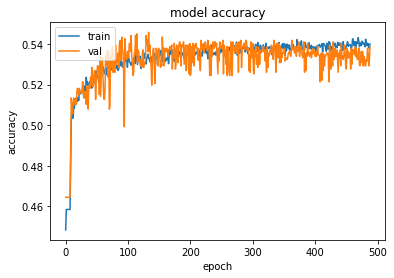

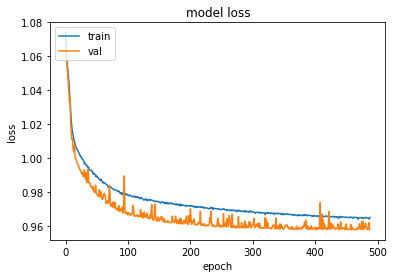

In [19]:
score = model03.evaluate(test_X03, test_y03, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model03.history.history['accuracy'])
plt.plot(model03.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model03.history.history['loss'])
plt.plot(model03.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Test Score: 0.9477059493746076
Test Accuracy: 0.56142855


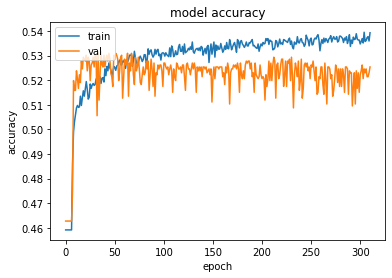

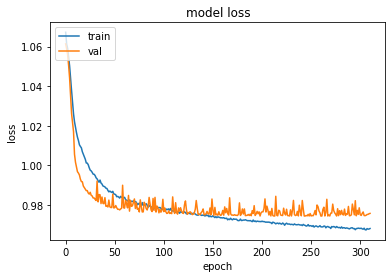

In [20]:
score = model04.evaluate(test_X04, test_y04, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model04.history.history['accuracy'])
plt.plot(model04.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model04.history.history['loss'])
plt.plot(model04.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
pred=model01.predict_proba(test_X01)
for i in range(len(test_X01)):
	print("X=%s, Predicted=%s" % (test_X01[i], pred[i]))

X=[0.07078859 0.11326174 0.14157718 0.24776006 0.03539429 0.07078859
 0.77867447 0.31854865 0.14157718 0.14157718 0.07078859 0.28315435
 0.24776006], Predicted=[0.23594505 0.2614218  0.50263315]
X=[0.05194258 0.08440669 0.10388515 0.20777031 0.         0.05194258
 0.6752535  0.18179902 0.18179902 0.02597129 0.05194258 0.57136834
 0.28568417], Predicted=[0.23191515 0.2653878  0.5026971 ]
X=[0.20025982 0.12743807 0.06080616 0.03641088 0.10923263 0.21846526
 0.18205439 0.72821754 0.14564351 0.14564351 0.07282175 0.40051965
 0.32769789], Predicted=[0.58864623 0.2367122  0.17464153]
X=[0.0732974  0.09382067 0.08209308 0.02931896 0.05863792 0.20523271
 0.32250854 0.61569812 0.11727583 0.02931896 0.14659479 0.43978437
 0.46910333], Predicted=[0.3106294  0.30053583 0.38883483]
X=[0.03936341 0.15139772 0.30279544 0.24223635 0.06055909 0.
 0.72670906 0.09083863 0.15139772 0.03027954 0.12111818 0.39363408
 0.30279544], Predicted=[0.06636392 0.15307952 0.7805566 ]
X=[0.11224753 0.10476436 0.058368

 0.16230958], Predicted=[0.342519   0.29654986 0.36093122]
X=[0.06222515 0.09616614 0.08768089 0.16970495 0.         0.11313663
 0.59396732 0.48083069 0.19798911 0.05656832 0.02828416 0.50911485
 0.22627326], Predicted=[0.28326243 0.291609   0.42512855]
X=[0.07417539 0.10596484 0.08975845 0.12466451 0.03116613 0.15583064
 0.46749193 0.56099032 0.06233226 0.12466451 0.12466451 0.34282742
 0.49865806], Predicted=[0.3266153  0.29554668 0.37783802]
X=[0.05700129 0.13970905 0.21422055 0.0745115  0.14902299 0.14902299
 0.26079023 0.52158047 0.14902299 0.11176724 0.11176724 0.37255748
 0.59609196], Predicted=[0.14087717 0.24870665 0.6104162 ]
X=[0.08052482 0.10103875 0.08052482 0.0306178  0.15308901 0.12247121
 0.39803142 0.67359164 0.12247121 0.09185341 0.09185341 0.36741362
 0.39803142], Predicted=[0.3466448  0.29727432 0.35608083]
X=[0.14899555 0.121549   0.08233965 0.11762807 0.11762807 0.15683742
 0.3528842  0.31367484 0.19604678 0.11762807 0.07841871 0.7057684
 0.3528842 ], Predicted=[0

 0.44318175], Predicted=[0.32512406 0.29725698 0.37761903]
X=[0.15490239 0.12004935 0.07938748 0.0387256  0.19362799 0.15490239
 0.11617679 0.30980478 0.27107919 0.0387256  0.0774512  0.69706077
 0.46470718], Predicted=[0.45645845 0.27348635 0.27005515]
X=[0.06165992 0.09542606 0.10570271 0.23489492 0.05872373 0.
 0.73404663 0.14680933 0.20553306 0.02936187 0.05872373 0.52851357
 0.17617119], Predicted=[0.25739232 0.26747555 0.4751322 ]
X=[0.07158693 0.10181252 0.10340334 0.03181641 0.09544924 0.19089847
 0.28634771 0.76359389 0.12726565 0.09544924 0.09544924 0.28634771
 0.38179694], Predicted=[0.26392472 0.30270913 0.43336618]
X=[0.03994648 0.14686206 0.2202931  0.02937241 0.11748965 0.14686206
 0.17623448 0.58744825 0.05874483 0.02937241 0.20560689 0.35246895
 0.58744825], Predicted=[0.13753067 0.24385837 0.6186109 ]
X=[0.13783415 0.09976567 0.04384439 0.10501649 0.02625412 0.13127061
 0.31504947 0.60384483 0.13127061 0.05250825 0.07876237 0.5775907
 0.3413036 ], Predicted=[0.5594923

 0.47504443], Predicted=[0.36393312 0.29389298 0.3421739 ]
X=[0.16632919 0.11643043 0.04490888 0.05544306 0.         0.22177226
 0.33265838 0.63759523 0.11088613 0.05544306 0.11088613 0.49898757
 0.33265838], Predicted=[0.5927943  0.23866908 0.16853659]
X=[0.25154786 0.12577393 0.03801168 0.11179905 0.05589952 0.11179905
 0.25154786 0.33539715 0.2235981  0.02794976 0.02794976 0.75464358
 0.30744739], Predicted=[0.7233191  0.17967926 0.09700166]
X=[0.03530984 0.13274378 0.2389388  0.18584129 0.07964627 0.
 0.74336516 0.21239005 0.10619502 0.10619502 0.05309751 0.39823133
 0.31858507], Predicted=[0.09755535 0.18816446 0.7142802 ]
X=[0.04583655 0.13368994 0.23873203 0.12732375 0.06366188 0.12732375
 0.509295   0.47746406 0.06366188 0.15915469 0.09549281 0.31830938
 0.509295  ], Predicted=[0.11466334 0.21307266 0.672264  ]
X=[0.1397829  0.11648575 0.05436002 0.0931886  0.06212573 0.15531433
 0.2795658  0.3727544  0.15531433 0.0931886  0.06212573 0.71444594
 0.40381727], Predicted=[0.501932

 0.510689  ], Predicted=[0.25270492 0.29402542 0.45326966]
X=[0.06207085 0.1241417  0.14931488 0.13793523 0.13793523 0.06896761
 0.58622471 0.37932187 0.24138664 0.03448381 0.06896761 0.51725709
 0.31035426], Predicted=[0.1940626  0.2684054  0.53753203]
X=[0.05917755 0.10356072 0.1065196  0.08876633 0.08876633 0.11835511
 0.266299   0.38465411 0.05917755 0.05917755 0.17753266 0.47342044
 0.68054188], Predicted=[0.25925    0.29133436 0.44941565]
X=[0.05785475 0.0936696  0.0936696  0.08264965 0.02754988 0.16529929
 0.27549882 0.52344776 0.         0.08264965 0.19284917 0.19284917
 0.71629693], Predicted=[0.2825963  0.29118958 0.42621407]
X=[0.13467318 0.14589594 0.10684072 0.13467318 0.13467318 0.17956424
 0.31423741 0.53869271 0.22445529 0.04489106 0.17956424 0.49380165
 0.40401953], Predicted=[0.43124995 0.28224075 0.2865094 ]
X=[0.05668277 0.11795259 0.15563189 0.16382304 0.03276461 0.13105843
 0.3931753  0.52423373 0.03276461 0.09829382 0.19658765 0.29488147
 0.58976295], Predicted=[

 0.44764203], Predicted=[0.30488563 0.29267815 0.40243632]
X=[0.07694047 0.10258729 0.09617558 0.06411706 0.09617558 0.16029264
 0.38470234 0.51293645 0.16029264 0.03205853 0.12823411 0.38470234
 0.57705351], Predicted=[0.28468755 0.29570952 0.41960296]
X=[0.02857989 0.20233547 0.53113062 0.17704354 0.05058387 0.02529193
 0.55642255 0.15175161 0.         0.0758758  0.17704354 0.20233547
 0.48054675], Predicted=[0.01779702 0.07827204 0.9039309 ]
X=[0.23414123 0.13902135 0.03980401 0.11707061 0.08780296 0.08780296
 0.3804795  0.40974715 0.23414123 0.05853531 0.         0.70242368
 0.17560592], Predicted=[0.72331655 0.18024123 0.09644216]
X=[0.25993625 0.14621414 0.04548884 0.12996813 0.09747609 0.09747609
 0.38990438 0.38990438 0.29242828 0.         0.03249203 0.68233266
 0.12996813], Predicted=[0.7381251  0.17368297 0.08819185]
X=[0.09972574 0.1059586  0.06856145 0.12465718 0.12465718 0.06232859
 0.40513583 0.37397153 0.18698577 0.06232859 0.06232859 0.65445018
 0.40513583], Predicted=[

In [22]:
pred=model02.predict_proba(test_X02)
for i in range(len(test_X02)):
	print("X=%s, Predicted=%s" % (test_X02[i], pred[i]))

X=[0.01213127 0.0136966  0.00939195 0.00391331 0.00782663 0.0273932
 0.04695977 0.0860929  0.43829114 0.24262545 0.46959765 0.24653877
 0.00391331 0.00391331 0.03130651 0.02347988 0.07435296 0.41089795
 0.19175238 0.43046452 0.24262545], Predicted=[0.26338235 0.29353833 0.44307932]
X=[0.01259217 0.01333288 0.00777751 0.01111074 0.00740716 0.01851789
 0.03703578 0.06666441 0.35554353 0.17777177 0.55183319 0.27776839
 0.01111074 0.01111074 0.01481431 0.0518501  0.05555368 0.49627952
 0.28887912 0.30369343 0.15925387], Predicted=[0.4492187  0.26437318 0.28640816]
X=[0.01600277 0.01295462 0.00781088 0.00381018 0.01524073 0.01905092
 0.01905092 0.06096293 0.36958777 0.18288879 0.50294418 0.28957392
 0.01143055 0.01143055 0.01524073 0.03429165 0.03429165 0.49532382
 0.26671282 0.36577759 0.18669898], Predicted=[0.40926844 0.27513373 0.31559786]
X=[0.00839126 0.01631634 0.02214361 0.02330906 0.00932362 0.01398544
 0.04661812 0.04195631 0.50813751 0.27504691 0.40557765 0.20978154
 0.00932362 0

 0.35126145 0.212148   0.11129076], Predicted=[0.7044691  0.14180309 0.15372777]
X=[0.00975868 0.01463803 0.0150816  0.00887153 0.         0.03548613
 0.04435766 0.08871532 0.41252622 0.19960946 0.49237001 0.24396712
 0.0133073  0.0133073  0.01774306 0.04879342 0.05766496 0.39478316
 0.1818664  0.48349848 0.21735253], Predicted=[0.24726763 0.28836957 0.46436274]
X=[0.00650531 0.01626328 0.02642783 0.0203291  0.00406582 0.01626328
 0.0406582  0.02846074 0.39438452 0.20735681 0.48383255 0.23581755
 0.01219746 0.01219746 0.01626328 0.0609873  0.06505312 0.40251615
 0.18296189 0.49603001 0.23988336], Predicted=[0.14187625 0.22579159 0.6323321 ]
X=[0.00725218 0.01269131 0.01305392 0.01813044 0.00362609 0.01450435
 0.04713915 0.04713915 0.37711318 0.20668703 0.45688712 0.22844356
 0.01813044 0.00362609 0.01450435 0.05801741 0.05439132 0.53303497
 0.26470444 0.38073927 0.20668703], Predicted=[0.236577   0.27855724 0.4848658 ]
X=[0.00370283 0.02436072 0.07470622 0.02598477 0.         0.0064961

In [23]:
pred=model03.predict_proba(test_X03)
for i in range(len(test_X03)):
	print("X=%s, Predicted=%s" % (test_X03[i], pred[i]))

X=[5.17585125e-03 1.94094422e-02 3.14248112e-02 1.84851830e-02
 7.39407321e-03 1.10911098e-02 5.54555491e-02 4.80614759e-02
 5.24979198e-01 3.03157002e-01 3.03157002e-01 1.73760721e-01
 1.47881464e-02 1.10911098e-02 1.10911098e-02 4.06674027e-02
 3.32733295e-02 4.17765137e-01 2.07034050e-01 4.62129576e-01
 2.62489599e-01 2.13490846e-03 6.76287184e-04 2.11903318e-03
 1.02258459e-03 1.83215973e-03 7.26203619e-04 2.09991679e-03
 4.68638443e-04], Predicted=[0.10643624 0.19515151 0.6984122 ]
X=[0.0203177  0.01625416 0.00619206 0.01935019 0.00774008 0.01161011
 0.08127079 0.04644045 0.42570415 0.22446219 0.30186294 0.17802173
 0.0309603  0.00387004 0.00387004 0.08127079 0.01935019 0.67338656
 0.36378354 0.18576181 0.08514083 0.00204057 0.00140122 0.00228233
 0.00100958 0.00209071 0.00086458 0.00177377 0.00087955], Predicted=[0.519721   0.24527393 0.23500504]
X=[1.18728385e-02 1.31449283e-02 1.14488086e-02 4.24029947e-03
 2.12014973e-02 1.69611979e-02 1.69611979e-02 3.39223957e-02
 4.36750845

 0.00106337 0.001724   0.00089651 0.00158921 0.00071487], Predicted=[0.29356346 0.28584126 0.42059526]
X=[0.01038791 0.01329653 0.01204998 0.01662066 0.0124655  0.0124655
 0.05401716 0.04155166 0.32410293 0.18698246 0.49446473 0.25762028
 0.02908616 0.         0.0124655  0.05817232 0.04986199 0.51939572
 0.27839611 0.38227525 0.20775829 0.00239721 0.00120038 0.00216488
 0.00067019 0.00222717 0.00086824 0.00225824 0.00099724], Predicted=[0.29563555 0.28382027 0.42054415]
X=[0.00925432 0.01388148 0.0157744  0.00420651 0.00841302 0.02944555
 0.03365206 0.08833666 0.47954188 0.21453189 0.46692236 0.21453189
 0.00841302 0.01261952 0.02103254 0.04206508 0.07571714 0.33231411
 0.17667332 0.4921614  0.23977094 0.00188186 0.00065984 0.00193272
 0.00173209 0.00223637 0.00100155 0.00204932 0.00132837], Predicted=[0.28283757 0.2880467  0.42911577]
X=[0.00663355 0.01768947 0.03316776 0.01768947 0.01768947 0.00884474
 0.04864604 0.03095657 0.52626176 0.22996312 0.45550388 0.24765259
 0.01768947 0.00

In [24]:
pred=model04.predict_proba(test_X04)
for i in range(len(test_X04)):
	print("X=%s, Predicted=%s" % (test_X04[i], pred[i]))

X=[0.00714366 0.01274275 0.01737647 0.02316863 0.00386144 0.01158432
 0.05406014 0.03861439 0.49812562 0.27416216 0.00233714 0.50970993
 0.23554777 0.0015243  0.01930719 0.00772288 0.01158432 0.05792158
 0.03475295 0.3475295  0.19307194 0.00204125 0.38614389 0.2085177
 0.00182019 0.00212529 0.00076141 0.00178445 0.00063302 0.00214524
 0.00115843 0.00208518 0.00064357], Predicted=[0.27725953 0.27557462 0.44716588]
X=[0.01182741 0.01357962 0.01226547 0.02190262 0.00876105 0.01314157
 0.07884943 0.06570786 0.39424713 0.19712357 0.00220559 0.45557446
 0.25407037 0.00217493 0.01752209 0.01752209 0.00876105 0.06570786
 0.05694681 0.39424713 0.21026514 0.00199204 0.4993797  0.25407037
 0.00238848 0.00219026 0.00175221 0.00244298 0.00113289 0.00233628
 0.00136891 0.00222869 0.00098184], Predicted=[0.28542918 0.28017583 0.43439502]
X=[0.00479812 0.01713614 0.03084505 0.01713614 0.01370891 0.00342723
 0.06169011 0.03084505 0.5003753  0.27417825 0.00191051 0.35300449
 0.16450695 0.00151672 0.0102

 0.00118317 0.00192852 0.00099962], Predicted=[0.28268293 0.27882472 0.43849233]
X=[1.71451822e-02 1.29942433e-02 6.67759726e-03 7.21902406e-03
 1.44380481e-02 1.44380481e-02 2.52665842e-02 4.33141444e-02
 3.78998763e-01 1.91304138e-01 1.88416528e-03 3.68170227e-01
 1.47989993e-01 1.72534675e-03 1.08285361e-02 1.08285361e-02
 1.44380481e-02 5.05331685e-02 6.85807286e-02 6.67759726e-01
 3.53732179e-01 2.20829946e-03 2.59884866e-01 1.11894873e-01
 1.40121257e-03 1.82194417e-03 4.76728004e-04 1.45088229e-03
 1.05644255e-03 1.91206583e-03 5.15644576e-04 1.55409546e-03
 2.21228157e-03], Predicted=[0.48464495 0.26265997 0.25269508]
X=[0.01045558 0.01380137 0.01150114 0.02091116 0.0125467  0.00836446
 0.07946241 0.05436901 0.48932113 0.26766284 0.00209843 0.3931298
 0.19238267 0.0020838  0.01672893 0.00418223 0.02091116 0.04600455
 0.06273348 0.50605006 0.25511614 0.00235251 0.36385417 0.16310704
 0.00182973 0.00228772 0.0012416  0.00204662 0.00118194 0.0021084
 0.00075417 0.00187479 0.001608